In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from collections import defaultdict

In [2]:
files = glob.glob('../Output/RF/*.csv')
files.sort()

In [3]:
files = dict(enumerate(files))
files
#len(files)

{0: '../Output/RF/BreastC Silhouette.csv',
 1: '../Output/RF/BreastC acc.csv',
 2: '../Output/RF/BreastC adjMI.csv',
 3: '../Output/RF/BreastC2D.csv',
 4: '../Output/RF/Faults Silhouette.csv',
 5: '../Output/RF/Faults acc.csv',
 6: '../Output/RF/Faults adjMI.csv',
 7: '../Output/RF/Faults2D.csv',
 8: '../Output/RF/SSE.csv',
 9: '../Output/RF/logliklihood.csv'}

In [4]:
dfs = defaultdict(int)
for indx, f in files.items():
    dfs[indx] = pd.read_csv(f)

## Part 1: Clustering Analyses

K-means SSE - Both datasets:  **dfs[8]**

GMM Loglikelihood - Both datasets:  **dfs[9]**

Silhouette - BreastC:  **dfs[0]** 

acc - BreastC:  **dfs[1]**

adjMI - BreastC:  **dfs[2]**

Visualize dataset in 2D - Breast C:  **dfs[3]**

Silhouette - Faults:  **dfs[4]** 

acc - Faults:  **dfs[5]**

adjMI - Faults:  **dfs[6]**

Visualize dataset in 2D - Faults:  **dfs[7]**

In [5]:
km_SSE = dfs[8]
gmm_log = dfs[9]
bc_ss = dfs[0].T[1:]
bc_acc = dfs[1].T[1:]
bc_adjMI = dfs[2].T[1:]
bc_2d = dfs[3]

f_ss = dfs[4].T[1:]
f_acc = dfs[5].T[1:]
f_adjMI = dfs[6].T[1:]
f_2d = dfs[7]

# Choosing K
## K-Means SSE: (Breast Cancer & Faulty Plates)

In [6]:
km_SSE.columns = ['clusters','bc_sse','fp_sse']
x = km_SSE['clusters']
bc_y = km_SSE['bc_sse']
f_y = km_SSE['fp_sse']
km_SSE.head()

,clusters,bc_sse,fp_sse
0,2,1916.467352,28777.164389
1,3,1424.261274,25712.860563
2,4,1179.598709,23781.798391
3,5,1024.467185,21139.434367
4,6,904.120218,19724.126306


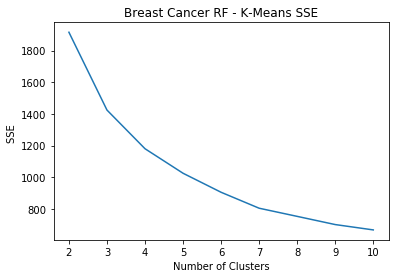

In [7]:
plt.plot(x,bc_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - K-Means SSE')
plt.show()

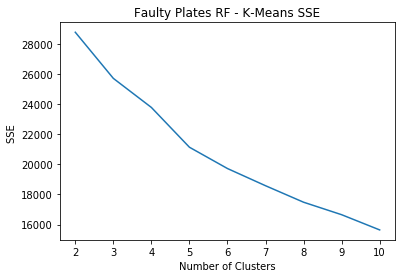

In [8]:
plt.plot(x,f_y)
plt.ylabel("SSE ")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RF - K-Means SSE')
plt.show()

## EM Log-Likelihood: (Breast Cancer & Faulty Plates)

In [9]:
gmm_log.columns = ['clusters','bc_log','fp_log']
x = gmm_log['clusters']
bc_y = gmm_log['bc_log']
f_y = gmm_log['fp_log']
gmm_log.head()

,clusters,bc_log,fp_log
0,2,1.487735,7.142958
1,3,1.915087,10.425929
2,4,2.677029,13.880640
3,5,2.947471,16.543559
4,6,3.625564,17.772207


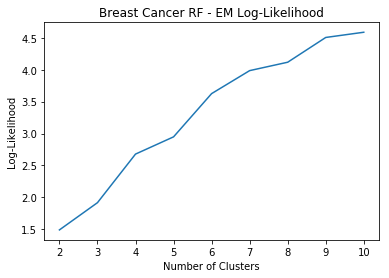

In [10]:
plt.plot(x,bc_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - EM Log-Likelihood')
plt.show()

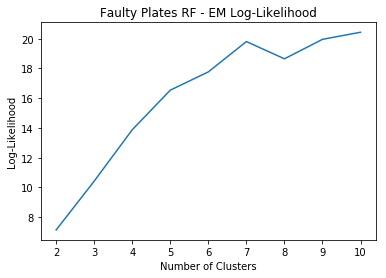

In [11]:
plt.plot(x,f_y)
plt.ylabel("Log-Likelihood")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RF - EM Log-Likelihood')
plt.show()

# Breast Cancer Dataset

## Silhouette Score: K-Means and EM

In [12]:
bc_ss['clusters'] = bc_ss.index
bc_ss.columns = ['gmm_ss','km_ss','clusters']
x = bc_ss['clusters']
gmm_y = bc_ss['gmm_ss']
km_y = bc_ss['km_ss']
bc_ss.head()

,gmm_ss,km_ss,clusters
2,0.508111,0.557245,2
3,0.490268,0.424854,3
4,0.334178,0.404753,4
5,0.309843,0.362533,5
6,0.172576,0.27683,6


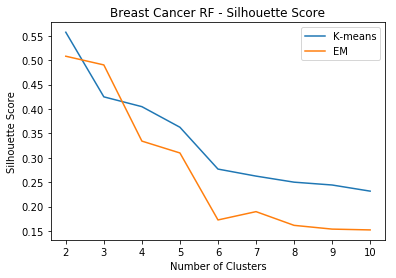

In [13]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [14]:
bc_acc['clusters'] = bc_acc.index
bc_acc.columns = ['gmm_acc','km_acc','clusters']
x = bc_acc['clusters']
gmm_y = bc_acc['gmm_acc']
km_y = bc_acc['km_acc']
bc_acc.head()

,gmm_acc,km_acc,clusters
2,0.925275,0.916484,2
3,0.931868,0.916484,3
4,0.848352,0.903297,4
5,0.850549,0.885714,5
6,0.916484,0.92967,6


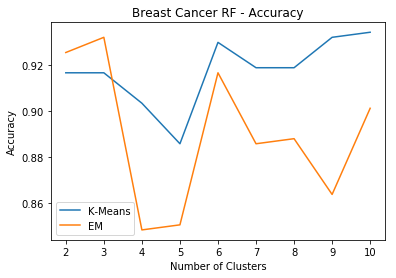

In [15]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [16]:
bc_adjMI['clusters'] = bc_adjMI.index
bc_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = bc_adjMI['clusters']
gmm_y = bc_adjMI['gmm_adjMI']
km_y = bc_adjMI['km_adjMI']

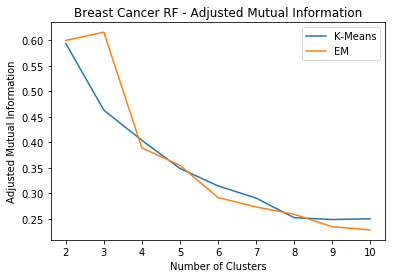

In [17]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Breast Cancer RF - Adjusted Mutual Information')
plt.legend()
plt.show()

# Faulty Plates Dataset

## Silhouette Score: K-Means and EM

In [18]:
f_ss['clusters'] = bc_ss.index
f_ss.columns = ['gmm_ss','km_ss','clusters']
x = f_ss['clusters']
gmm_y = f_ss['gmm_ss']
km_y = f_ss['km_ss']
f_ss.head()

,gmm_ss,km_ss,clusters
2,0.263265,0.304814,2
3,0.190154,0.184685,3
4,0.151482,0.179832,4
5,0.146717,0.182477,5
6,0.143998,0.189261,6


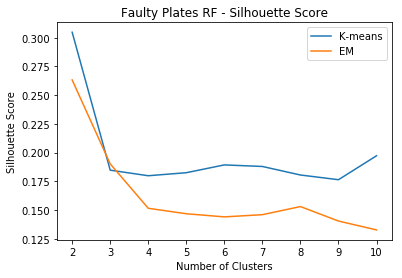

In [19]:
plt.plot(x,km_y, label="K-means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Silhouette Score")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RF - Silhouette Score')
plt.legend()
plt.show()

## Cluster Evaluation 
## Accuracy Score: K-Means and EM

In [20]:
f_acc['clusters'] = f_acc.index
f_acc.columns = ['gmm_acc','km_acc','clusters']
x = f_acc['clusters']
gmm_y = f_acc['gmm_acc']
km_y = f_acc['km_acc']
f_acc.head()

,gmm_acc,km_acc,clusters
2,0.461985,0.493557,2
3,0.498711,0.498711,3
4,0.50451,0.530284,4
5,0.496134,0.528351,5
6,0.502577,0.523196,6


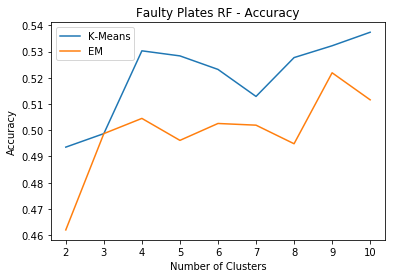

In [21]:
plt.plot(x,km_y, label = "K-Means")
plt.plot(x,gmm_y, label = "EM")
plt.ylabel("Accuracy")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RF - Accuracy')
plt.legend()
plt.show()

## Adjusted MI: K-Means and EM

In [22]:
f_adjMI['clusters'] = f_adjMI.index
f_adjMI.columns = ['gmm_adjMI','km_adjMI','clusters']
x = f_adjMI['clusters']
gmm_y = f_adjMI['gmm_adjMI']
km_y = f_adjMI['km_adjMI']

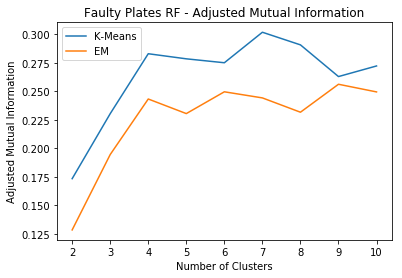

In [23]:
plt.plot(x,km_y, label="K-Means")
plt.plot(x,gmm_y, label="EM")
plt.ylabel("Adjusted Mutual Information")
plt.xlabel("Number of Clusters")
plt.title('Faulty Plates RF - Adjusted Mutual Information')
plt.legend()
plt.show()

## 2D Visualizaion

In [24]:
f_2d.columns = ['data','x','y','target']
f_2d.head()

,data,x,y,target
0,0,1.907279,5.935023,Dirtiness
1,1,9.944145,-13.415908,Bumps
2,2,0.268125,10.346998,Dirtiness
3,3,-4.424544,12.502600,Other_Faults
4,4,11.528710,1.883293,Stains


## RF Analyses

In [25]:
files1 = glob.glob('../Output/RF/RF/*scree.csv')
files1.sort()

In [26]:
files1 = dict(enumerate(files1))
files1

{0: '../Output/RF/RF/bc scree.csv', 1: '../Output/RF/RF/faults scree.csv'}

In [27]:
dfs1 = defaultdict(int)
for indx, f in files1.items():
    dfs1[indx] = pd.read_csv(f,names = ["Features","Gini Importance"])

In [28]:
bc_scree = dfs1[0][:26]
f_scree = dfs1[1]

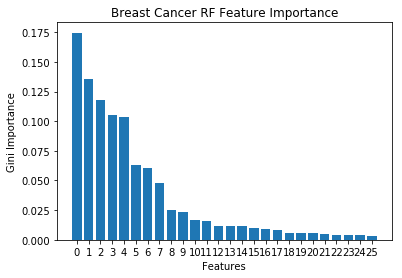

In [29]:
height = bc_scree["Gini Importance"]
bars = bc_scree["Features"]
y_pos = np.arange(len(bars))
plt.ylabel("Gini Importance")
plt.xlabel("Features")
plt.title('Breast Cancer RF Feature Importance')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()

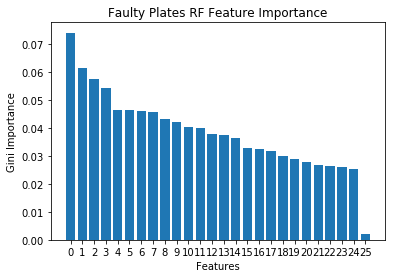

In [30]:
height = f_scree["Gini Importance"]
bars = f_scree["Features"]
y_pos = np.arange(len(bars))
plt.ylabel("Gini Importance")
plt.xlabel("Features")
plt.title('Faulty Plates RF Feature Importance')
plt.bar(y_pos,height)
plt.xticks(y_pos, bars)
plt.show()